In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Алгоритм k-means

Алгоритм k-means является одним из самых популярных методов кластеризации данных. Он используется для разбиения набора данных на \(k\) групп (кластеров) на основе схожести данных. Этот алгоритм особенно полезен в задачах, связанных с сегментацией, упрощением данных и анализом шаблонов.

## Основные шаги алгоритма k-means:

1. **Выбор количества кластеров $k$**:
   - На первом этапе необходимо задать количество кластеров $k$, на которое будет разделен набор данных. Этот параметр обычно выбирается экспериментально.

2. **Инициализация центроидов**:
   - Случайным образом выбираются $k$ точек из данных, которые станут начальными центроидами кластеров. Центроид — это точка, представляющая центр кластера.

3. **Назначение точек кластерам**:
   - Для каждой точки в наборе данных вычисляется расстояние до каждого из $k$ центроидов. Точка присваивается кластеру, центроид которого находится ближе всего к этой точке. В этом шаге обычно используется эвклидово расстояние, но могут применяться и другие метрики расстояния.

4. **Обновление центроидов**:
   - После назначения всех точек пересчитываются центроиды. Новый центроид каждого кластера вычисляется как среднее значение всех точек, принадлежащих этому кластеру.

5. **Повторение шагов 3 и 4**:
   - Шаги 3 и 4 повторяются до тех пор, пока центроиды не перестанут изменяться (или изменения будут незначительными) или пока не будет достигнуто максимальное количество итераций. Это означает, что алгоритм сошелся и кластеры стабилизировались.


## Заключение

Алгоритм k-means является мощным инструментом для кластеризации данных, который используется в различных областях, таких как маркетинг, биоинформатика, обработка изображений и многие другие. Несмотря на свои ограничения, он остается одним из основных методов для решения задач кластеризации.

# Что оптимизирует k_means:

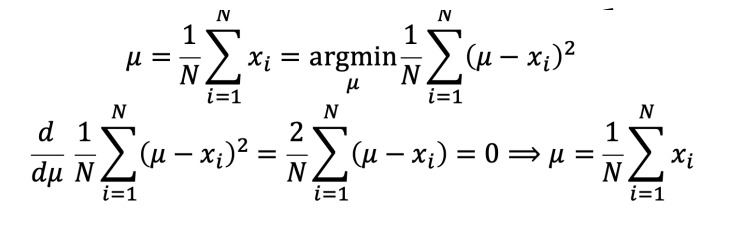

# Task

Напишите алгоритм кластеризации данных для предложенной выборки с тремя кластерами.

In [7]:
coords = np.concatenate([np.random.randn(100, 2)+np.array([1, 2]),
                         np.random.randn(100, 2)+np.array([-5, 4]),
                         np.random.randn(150, 2)+np.array([3, -5])], axis=0)
coords

array([[ 1.55475063,  2.5234923 ],
       [ 1.9468964 ,  3.34096563],
       [-0.12606709,  2.08562653],
       [ 0.5345635 ,  2.23885191],
       [ 0.73382037,  1.37485805],
       [-0.96074482,  1.20372809],
       [ 0.60700049,  4.29650423],
       [ 2.47055665,  1.94601961],
       [ 2.67236783,  1.33858408],
       [ 0.46835181,  3.01980939],
       [ 1.46689346, -0.47745216],
       [ 0.32177074,  2.40938391],
       [ 1.32051804,  1.72840017],
       [-0.68910147,  2.69052022],
       [ 1.54189442,  1.88181598],
       [ 1.36704201,  3.49809836],
       [ 0.42984003,  2.16581201],
       [-0.11586823,  1.30369048],
       [ 0.77757496,  2.25955542],
       [-1.44931571,  1.31486465],
       [ 1.61570774,  1.69752936],
       [ 2.55414512,  2.89332251],
       [ 1.77916099,  1.10125254],
       [ 1.11041975,  1.57507241],
       [ 1.48536051,  2.45855894],
       [ 0.59544354,  2.15000772],
       [ 0.62847414,  3.41335386],
       [-1.81917678,  1.98482455],
       [ 1.25833337,

<Axes: >

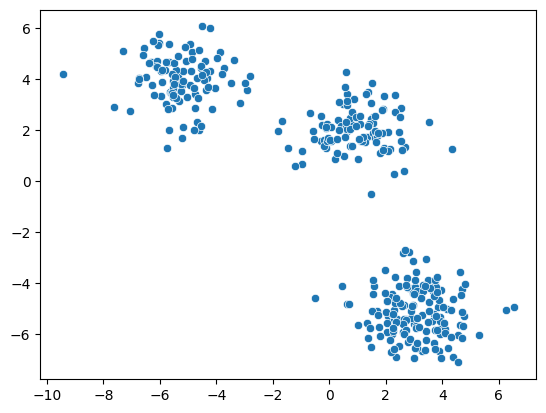

In [8]:
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])

<Axes: >

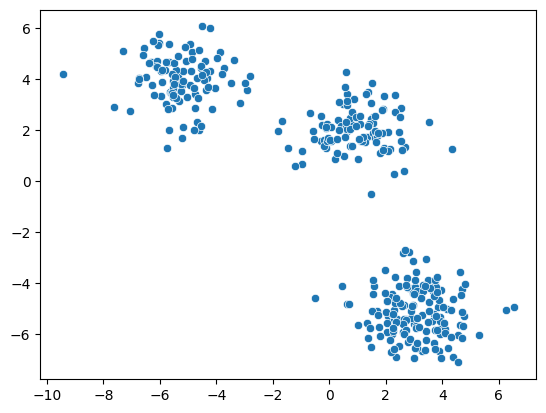

In [9]:
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])

In [10]:
def distance(coords,centroid):
  return np.sum((coords-centroid)**2,axis=1)**.5
centroid1=np.array([0,4
                    ])
centroid2=np.array([-2, 4])
centroid3=np.array([2,-5])
centroids=np.array([centroid1,centroid2,centroid3])

def new_(centroids):
  distances=[]
  for i in centroids:
    distances.append(distance(coords,i))
  new_coord=np.argmin(distances,axis=0)
  for i in np.unique(new_coord):
    new_centroids=np.array([np.mean(coords[new_coord==i],axis=0)for i in np.unique(new_coord)])
  return new_centroids

while np.max(np.abs(centroids-new_(centroids)))>0.0000001:
  centroids=new_(centroids)
  print(centroids)



[[ 1.04079615  2.07242947]
 [-5.11476122  3.89218532]
 [ 3.03997301 -5.09422281]]
[[ 0.94188373  2.02669074]
 [-5.25781013  3.98521546]
 [ 3.05046021 -5.12500128]]


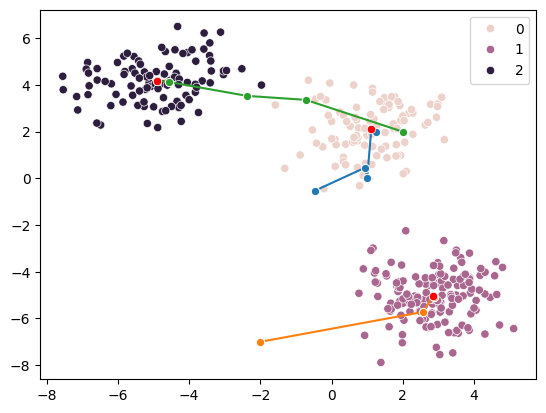

In [11]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


def init_centroids(num_clusters: int, data: np.ndarray) -> np.ndarray:
    return np.random.randint(data.min(), data.max(), (num_clusters, data.shape[1]))


def centr_dist(data: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    return np.linalg.norm(data - centroid, axis=1)


def k_means(data: np.ndarray, num_clusters: int, n_iter: int = 20) -> tuple:
    centroids = init_centroids(num_clusters, data)
    centr_history = []
    for _ in range(n_iter):
        labels = np.argmin(np.array([centr_dist(data, centroids[i]) for i in range(num_clusters)]).T, axis=1)
        centr_history.append(centroids.copy())

        new_centroids = []
        empty_cluster = False
        for i in range(num_clusters):
            points_in_cluster = data[labels == i]
            if points_in_cluster.size == 0:
                empty_cluster = True
                centroids = init_centroids(num_clusters, data)
                break
            new_centroids.append(points_in_cluster.mean(axis=0))
        if (not empty_cluster):
            centroids = np.array(new_centroids)

    labels = np.argmin(np.array([centr_dist(data, centroids[i]) for i in range(num_clusters)]).T, axis=1)
    history = np.array(centr_history)

    return labels, centroids, history


def plot_clusters(data: np.ndarray, labels: np.ndarray, centroids: np.ndarray, history: np.ndarray):
    dimensions = data.shape[1]
    if dimensions == 2:
        sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels)
        for i in range(len(centroids)):
            sns.lineplot(x=history[:, i, 0], y=history[:, i, 1], marker='o')
        sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', zorder=2)
    elif dimensions >= 3:
        fig = px.scatter_3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], color=labels, title='3D Clusters and Centroids')
        fig.add_trace(go.Scatter3d(
            x=centroids[:, 0],
            y=centroids[:, 1],
            z=centroids[:, 2],
            mode='markers',
            marker=dict(size=10, color='red', symbol='circle'),
            name='Centroids'
        ))
        fig.show()
    else:
        raise ValueError("Error: required more than 1 dimension")


coords = np.concatenate([np.random.randn(100, 2) + np.array([1, 2]),
                         np.random.randn(100, 2) + np.array([-5, 4]),
                         np.random.randn(150, 2) + np.array([3, -5])], axis=0)
labels, centroids, history = k_means(coords, 3, 20)
plot_clusters(coords, labels, centroids, history)